# Introduction to Scientific Computing

[Acknowledgments](#Acknowledgments)

In this course we will explore a number of physics problems and numerical approaches to solving them. We will strive to understand the fundamentals and to appreciate the mathematical and computational similarities between some disparate physics applications. 

In this notebook we will explore a simple numerical problem, staying attuned to some aspects of the problem that will arise again and again!

## A First Numerical Problem: Radioactive Decay

&#128310; What type of equation is this?

This equation is a first order linear ODE. We know this because the highest order derivative is the first derivative, because there are no terms with different orders, and because there are only derivatives of one variable.

You have encountered this equation before, and you can solve it analytically:

$$N_U = N_U(0) e^{-t/\tau}$$

&#128310; Describe this equation in words. What does the quantity $N_U(0)$ represent?

$N_U(0)$ represents the inital quantity of the the uranium nuclei at time $0$. We know this because we're evaluating $N_U(t)$ at $t=0$.

Radioactive decay thus represents a useful first problem for us to consider numerically, because we know the analytic solution and will be able to compare our numerical solution to it. So, how would we approach solving this differential equation numerically? 

Let's start by stating the problem in words. Our goal is to obtain $N_U$ as a function of $t$. Given the value of $N_U$ at some particular time like $t=0$, we want to estimate its value at later times.

Because we will start with a value and estimate values at later times, this is what's known as an **initial value problem**. We will explore these further in this course. Our approach here will be to realize that if we start with a given $N_U$ and we are able to estimate $N_U(\Delta t)$, i.e. $N_U$ a short time $\Delta t$ later, then we have only to repeat that process some number of times until we reach $N_U$ at the $t$ of interest.

Let's consider the definition of a derivative:

$$\frac{dx}{dt} = \lim_{\Delta t \rightarrow 0} \frac{x(t + \Delta t) - x(t)}{\Delta t}$$

In a computer, there's no taking $\Delta t \rightarrow 0$: we are dealing with discrete processes. We can, however, assume $\Delta t$ is small enough that

$$\frac{dx}{dt} \approx \frac{x(t + \Delta t) - x(t)}{\Delta t}$$

Let's rearrange this to find our approximation for $x$ at time $t + \Delta t$:

$$ x(t + \Delta t) = x(t) + \frac{dx}{dt} \Delta t $$

&#128310; Describe this equation in words.

This equation suggests that the value of $x$ at a slightly future time is equilavent to the value of $x$ at the present time plus the rate of change of $x$ at the current time times the timestep we're considering.

Another way to see this is to Taylor expand:

$$x(t + \Delta t) = x(t) + \frac{dx}{dt}\Delta t + \frac{1}{2}(\Delta t)^2 \frac{d^2x}{dt^2} + ...$$

and then truncate, where if $\Delta t$ is small enough, we can drop the $\mathcal{O} (\Delta t)^2$ terms. 

Recalling our linear system $\frac{dN_U}{dt} = -\frac{1}{\tau} N_U $, we write

$$ N_U(t + \Delta t) = N_U(t) - \frac{1}{\tau} N_U(t) \Delta t $$

We will find it useful to index our timesteps. Let's consider time $t$ to be timestep $k$, and time $t + \Delta t$ to be $k+1$. (And let's drop the $U$ subscript on $N_U$ to keep this notation clean.)

$$ N_{k+1} = N_k - \frac{1}{\tau} \Delta t N_k$$

Now we have a recipe for evolving our system from timestep $k$ to timestep $k+1$. Let's code it up.

&#128310; What inputs will a function returning $N_{k+1}$ need?

A function returning $N_{k+1}$ will need the inputs: starting uranium quantity $N_k$, constant $\tau$, the timestep $\Delta t$.

&#128309; Import numpy and matplotlib.pyplot, and alias them as np and plt

In [37]:
import numpy as np
import matplotlib.pyplot as plt

&#128309; Write a function that takes $N_k$ and returns $N_{k+1}$. 

In [38]:
def linear_time_evolution(Nk, tau, delta_t):
    return Nk - (delta_t*Nk/tau) # from Euler's method

&#128310; Congratulations! You have just written your own implementation of what's known as **Euler's method** (or the "forward Euler method"). Of course, you've written this for the specific ODE defined above. Generalize to the differential equation 
$$ \frac{dx}{dt} = f(x, t) $$
and write the expression for Euler's method as an expression for $x(t + \Delta t)$ below.

The general expression for Euler's method is $$ x(t+ \Delta t) = x_k + f(x_k) \Delta t $$

&#128309; Write a more general implementation of Euler's method below, i.e. write a function that solves $\frac{dx}{dt} = f(x, t)$ using Euler's method. Also write a function that implements $f(x, t)$ for the radioactive decay problem. 

In [39]:
def Eulers_method(xk, f, delta_t):
    return xk + f*delta_t

def radioactive_decay(xk, tau): 
    return -(xk/tau)

&#128310; Describe in pseudocode how you will evolve your system in time using your functions.

We first can define a linspace with numpy, defining how we want to space our $\Delta t$. 
Then to solve the radioactive decay equation by choosing an arbitrary starting value of $N_k$ and $\tau$, and plugging in each value of $t$ in a reasonable range. 

&#128309; Use your functions to solve the radioactive decay equation.

In [40]:
tau = 1 # decay constant (s)
uranium = 100 # initial quantity of uranium (%)
delta_t = 0.01 # time step (s)
results = [] # store results

while uranium > 1: # continue until uranium quantity is less than 1
    results.append(uranium)
    uranium = Eulers_method(uranium, radioactive_decay(uranium, tau), delta_t) # update uranium quantity

&#128309; Plot your solution for $N_U$ as a function of time, and plot the analytic solution on the same plot. 

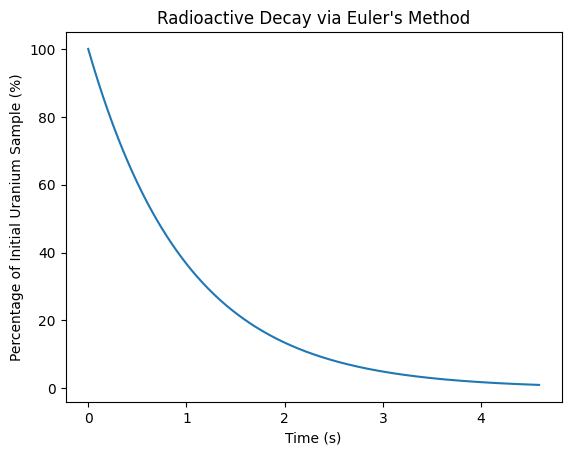

In [41]:
times = np.linspace(0, delta_t*len(results), len(results))
plt.plot(times, results)
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.title("Radioactive Decay via Euler's Method")
plt.show()

&#128310; Describe the results in words. Do the outputs look reasonable?  

These results do seem roughly reasonable. We see an initial sample of 100%, that exponentially decreases with a couple of seconds. That's likely what we expect from a radioactive decay type problem. 

&#128310; Experiment with different timesteps and describe the results here. 

As I made my timestep longer, the decay became a series of connected line segments. As I made the time steps shorter, we got a more continous curve representing the function more exactly. 

&#128309; Make a plot that clearly illustrates the effect of different timesteps on the accuracy of the solution. Describe the takeaways from your plot below it.

In [42]:
tau = 1 # decay constant (s)
uranium1, uranium2, uranium3 = 100, 100, 100 # initial quantity of uranium (%)
delta_t_1 = 0.01
delta_t_2 = 0.2
delta_t_3 = 0.75
results_1 = [] # store results
results_2 = [] # store results
results_3 = [] # store results

while uranium1 > 1: # continue until uranium quantity is less than 1
    results_1.append(uranium1)
    uranium1 = Eulers_method(uranium1, radioactive_decay(uranium1, tau), delta_t_1) # update uranium quantity

while uranium2 > 1: # continue until uranium quantity is less than 1
    results_2.append(uranium2)
    uranium2 = Eulers_method(uranium2, radioactive_decay(uranium2, tau), delta_t_2)
    
while uranium3 > 1: # continue until uranium quantity is less than 1
    results_3.append(uranium3)
    uranium3 = Eulers_method(uranium3, radioactive_decay(uranium3, tau), delta_t_3)

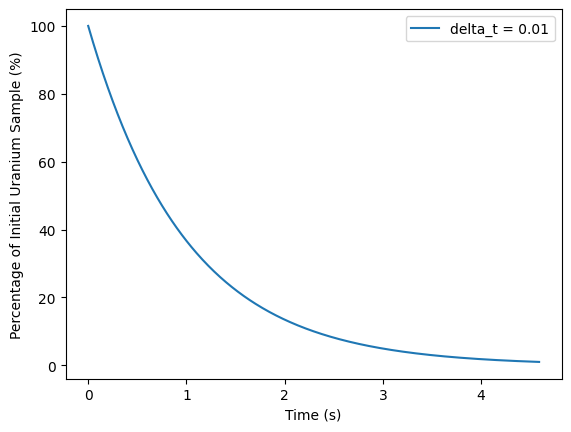

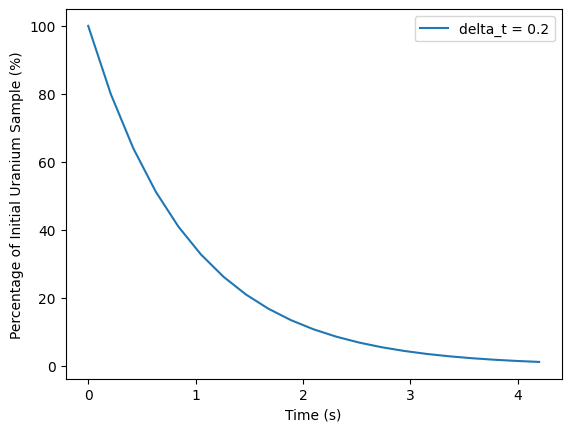

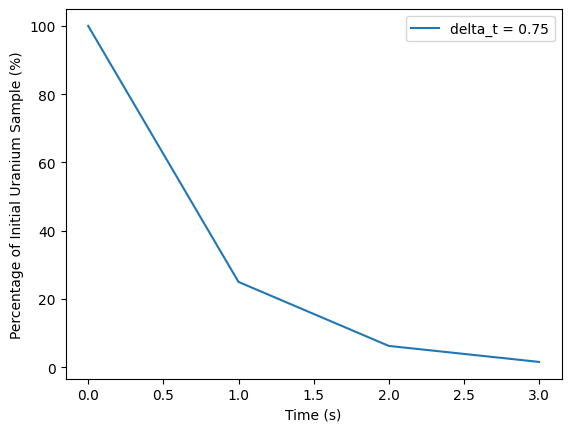

In [43]:
times1 = np.linspace(0, delta_t_1*len(results_1), len(results_1))
times2 = np.linspace(0, delta_t_2*len(results_2), len(results_2))
times3 = np.linspace(0, delta_t_3*len(results_3), len(results_3))

plt.plot(times1, results_1, label ="delta_t = 0.01")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.show()

plt.plot(times2, results_2, label ="delta_t = 0.2")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.show()

plt.plot(times3, results_3, label ="delta_t = 0.75")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.show()

I got here on 4/11/2024. 

I worked with no one. 

I would score my effort today a score of 8/10. 

I spent a while working on trying to put all the plots on the same graph to describe the comparision of the time scales and the contituity. I should've spent more time moving forward and decided to make them separate plots earlier. That being said, I'm happy I kept working on it and tried to push through, I learned a lot about matplotlib graphs. 

&#128309; Use your implementation of Euler's method to solve the differential equation 

$$\frac{dx}{dt} = -x^3 + \sin t$$

given the initial condition $x = 0$ at $t = 0$.

In [44]:
def diff_eq(x, t): 
    return -x**3 + np.sin(t)

diff_eq(0, 0)

0.0

In [45]:
x0, x = 0, 0 # initial x
t0, t = 0, 0 # initial t
delta_t = 0.1 # time step (s)
results = [] # store results
loop = 0 

results.append(x)
x = Eulers_method(x0, diff_eq(x, 0), delta_t) # first iteration

for iteration in range(500): # repeat 100 times
    results.append(x)
    x = Eulers_method(x, diff_eq(x, delta_t*iteration), delta_t)

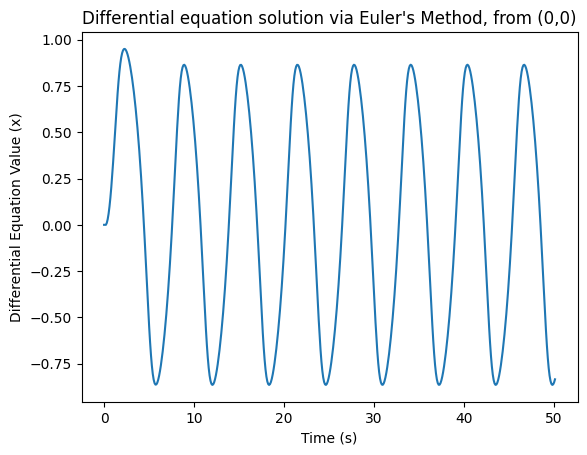

In [46]:
times = np.linspace(0, delta_t*len(results), len(results))
plt.plot(times, results)
plt.xlabel("Time (s)")
plt.ylabel("Differential Equation Value (x)")
plt.title("Differential equation solution via Euler's Method, from (0,0)")
plt.show()

Euler's method is simple and intuitive, but as we will soon see, we never use it in practice. There are better methods for solving these types of problems, which we will soon explore together!

## Numerical Error

One theme that we will return to many times in this class is whether our chosen method is appropriate for our problem. To that end, we need to understand sources of error in our calculations. There are several sources of error to be aware of. First, however, we need to have a quick introduction to variable types in Python.

### Variable Types

There are three main variable types that we will primarily use in this class:

*Integer*: Integer variables take integer values like `1`, `0`, or `-23423`.

*Float*: Floating-point variables, or "floats", take real values like `3.14159`, `1.0`, or `-9.2E4`

*Complex* Complex variables in Python represent the imaginary component with `j`, e.g., `8 + 4j` or `9.2 - 0.3j`. 

### Roundoff Error

Floating point numbers are represented in the computer as a finite number of bits, which means that they are not infinitely precise. 

Consider the following piece of code:

In [47]:
0.1 == 0.1

True

The operator `==` compares whether two values are equal. In this case it has returned `True`, because `0.1` is exactly equal to `0.1` in its computer representation. Let's try another one.

In [48]:
0.10001 == 0.1

False

The above cell returned `False`, because these two numbers no longer evaluate as equal. 

&#128309; Now try adding more zeros between the first and second 1 digit in the first number, and see what happens. (In other words, try `0.100001 == 0.1`, `0.10000001 == 0.1`, and so forth.) How many zeros do you need to add until the expression evaluates to `True`?

In [49]:
print(0.10000000000001 == 0.1)
print(0.1000000000000001 == 0.1)
print(0.10000000000000001 == 0.1) # 15 zeros evaluates to true
print(0.100000000000000001 == 0.1)

False
False
True
True


&#128309; Try writing a short function that initializes a value `epsilon = 1` and then continues to halve the value of `epsilon` until `1 + epsilon == 1`.

In [50]:
epsilon = 1
go = True
while go == True:
    if epsilon + 1 == 1: 
        go = False
    epsilon = (epsilon/2)

print(epsilon)

5.551115123125783e-17


&#128310; What is the final value of `epsilon`?

Epsilon ends off with a value of: 5.55 * e^-17. This makes sense as it is close to the 10^-17 we got in the previous example of the roundoff error. 

&#128309; Come up with an example of your own to illustrate roundoff error. 

In [51]:
print(0.99999999999999999999999999999 == 1) # sometimes 0.999... really does equal 1 : )

True


&#128310; Suppose you do some arithmetic with floating point values, and you want to check the answer. Let's say for example that you are adding $1.1 + 2.2$ and you want to check that the answer is $3.3$. Would it be a good idea to write `assert my_sum == 3.3`? Why or why not? 

Yes, we can write that because it would raise an error if the sum is not 3.3, and do nothing if it is truly 3.3. This is an effective way to check. However, as we proved before, if we need hyper-accuracy, then an assert erorr won't be raised because python does note mostly similar values (up to 10^-17) as equal under an == equivalency.

-------
Update after checking with the next problem. 
This won't work because we have a floating point error. This doesn't work due to how these numbers are being stored in memory as types and we should instead using an approximation method to check this result. 


&#128309; Try it and see what happens. 

In [52]:
try: 
    num1 = 1.1
    num2 = 2.2
    my_sum = num1 + num2
    assert my_sum == 3.3
except:
    pass

&#128309; Write some code that would be a better version of checking your answer for `1.1 + 2.2`. Can you do this without rounding?

In [53]:
num1 = 1.1
num2 = 2.2
my_sum = num1 + num2
assert my_sum < 3.4 and my_sum > 3.2 # no errors would indicate it was successful.

### Truncation Error

Roundoff error is inherent to computer hardware. There is a distinct type of error called **truncation error** that would be a consideration for us even if computers could achieve infinite precision. Truncation error boils down to the fact that our numerical algorithms involve approximating a continuous reality by a discrete representation. Let's think back to our Taylor series derivation of the **forward Euler** method. 

&#128310; What order was the leading-order term in the Taylor series that we neglected in our derivation? Express your answer in "big-O" notation using `$\mathcal{O}$`, which will render as $\mathcal{O}$.

We dropped everything with a square term in our Taylro series expansion. This is also $\mathcal{O}((\Delta t)^2)$

&#128309; Plot the fractional error in your numerical solution to the radioactive decay problem for several choices of timestep. Describe your results. 

In [54]:
def Eulers_method2(xk, tau, delta_t):
    return xk - (1/tau)*xk*delta_t + (1/tau**2)*xk*delta_t**2 # Radioactivate decay Euler's method with expanded term

In [55]:
tau = 1 # decay constant (s)
uranium1, uranium2, uranium3 = 100, 100, 100 # initial quantity of uranium (%)
delta_t_1 = 0.01
delta_t_2 = 0.2
delta_t_3 = 0.75
results_1 = [] # store results
results_2 = [] # store results
results_3 = [] # store results

while uranium1 > 1: # continue until uranium quantity is less than 1
    results_1.append(uranium1)
    uranium1 = Eulers_method2(uranium1, tau, delta_t_1) # update uranium quantity

while uranium2 > 1: # continue until uranium quantity is less than 1
    results_2.append(uranium2)
    uranium2 = Eulers_method2(uranium2, tau, delta_t_2)
    
while uranium3 > 1: # continue until uranium quantity is less than 1
    results_3.append(uranium3)
    uranium3 = Eulers_method2(uranium3, tau, delta_t_3)

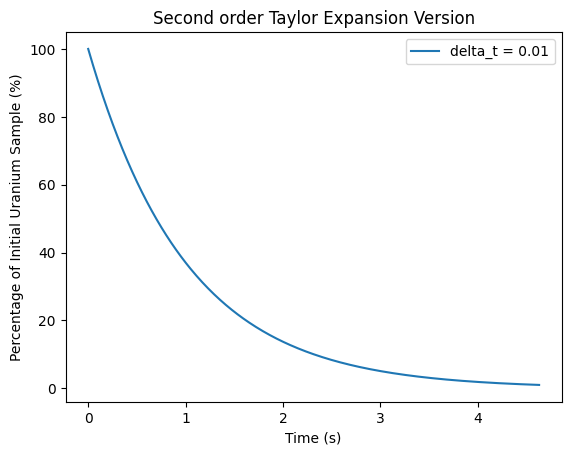

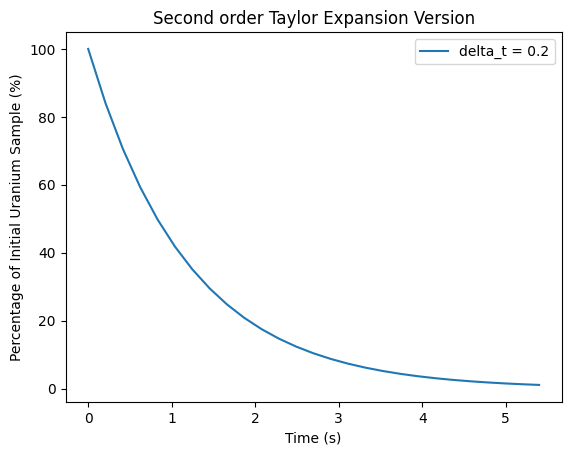

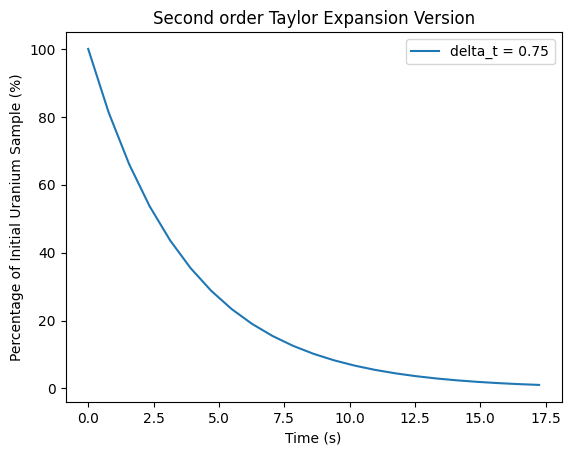

In [56]:
times1 = np.linspace(0, delta_t_1*len(results_1), len(results_1))
times2 = np.linspace(0, delta_t_2*len(results_2), len(results_2))
times3 = np.linspace(0, delta_t_3*len(results_3), len(results_3))

plt.plot(times1, results_1, label ="delta_t = 0.01")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.title("Second order Taylor Expansion Version")
plt.show()

plt.plot(times2, results_2, label ="delta_t = 0.2")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.title("Second order Taylor Expansion Version")
plt.show()

plt.plot(times3, results_3, label ="delta_t = 0.75")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage of Initial Uranium Sample (%)")
plt.title("Second order Taylor Expansion Version")
plt.show()

Here we recognize that the extra term in the expansion makes a noticeable difference in large timesteps, due to the squared delta_t term. We also notice that it smoothes out the last graph, delta_t = 0.75 by a noticeable amount. 

## Acknowledgments


S.E. Clark, last edited 2024

Radioactive Decay problem inspired by "Computational Physics: Second Edition" by Giordano and Nananishi (there are many similar treatments to be found). 

<html>
<body>
Floating point number discussion inspired by the <a target="_blank" rel="noopener noreferrer" href="https://docs.python.org/3/tutorial/floatingpoint.html">Python Tutorial</a>.
</body>
</html>
